In [1]:
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import os

In [5]:
data_wanted = pd.read_csv('../data/from_lilianne.dat', delim_whitespace=True, 
                          usecols=['idx','objectID','hostless'])


In [6]:
data_wanted.shape

(181, 3)

In [9]:
data_wanted[data_wanted['hostless'] == True]

,idx,objectID,hostless
2,2,ZTF22aakkmri,True
3,3,ZTF23aaawbsy,True
6,6,ZTF18abtvstb,True
7,7,ZTF22aaftcmp,True
9,9,ZTF23aacdnjz,True
...,...,...,...
175,175,ZTF23aadbswn,True
176,176,ZTF23aapvrkk,True
178,178,ZTF22aaahull,True
179,179,ZTF22aaszlph,True


In [44]:

wanted_names = list(data_wanted[data_wanted['hostless']]['objectID'])

should_not_survive =  list(data_wanted[~data_wanted['hostless']]['objectID'])

sso_names = ['ZTF22abbbydh','ZTF23aaoqpbu','ZTF22abdgjks','ZTF23aasnmmq','ZTF22abhfiew','ZTF22abisymj','ZTF22abfbxop',
             'ZTF22abhhnzr','ZTF23aasnmru','ZTF22abqmkvz','ZTF23aasnmke','ZTF23aasnisu','ZTF22abmzlbw','ZTF22ablizvx',
             'ZTF22abngynh','ZTF22abmgjsc','ZTF22aaodjcr','ZTF22abpugfh','ZTF22abjiryo','ZTF23aaoginy','ZTF22abhifxw',
             'ZTF23aaogjqe','ZTF23aaogjku','ZTF23aaummdv','ZTF23aaogigp','ZTF23aaogiju','ZTF23aaogins','ZTF22aadtiqy',
             'ZTF23aauyuxn','ZTF22aautkkx','ZTF23aaogiaf','ZTF22aaamcvt','ZTF23aaugvmy','ZTF23aaoghvk','ZTF22aavchkl',
             'ZTF23aaofwyr','ZTF23aaogjzn','ZTF23aaoggla','ZTF22abbxmvp','ZTF22abjkduc','ZTF23aaogjoi','ZTF23aanbiwv',
             'ZTF23aaotrxv','ZTF23aaofzxw','ZTF22abpuvwl','ZTF22aavchdb','ZTF23aasoswf','ZTF22aalbvkt','ZTF23aaogpip',
             'ZTF22aaamctk','ZTF22aaemvon','ZTF23aalvzey','ZTF23aaogfwq','ZTF23aaogpix','ZTF22aarxhdg','ZTF22abkwgdf',
             'ZTF23aaogfzp','ZTF23aakabyo','ZTF23aaogjqd','ZTF22aaerjna','ZTF23aaogjgw','ZTF22aacqokz','ZTF23aaognat',
             'ZTF23aaogjor','ZTF22aadgikt','ZTF22abgcphv','ZTF23aaogihz','ZTF23aaogijv','ZTF22aamslae','ZTF23aaofzxv',
             'ZTF22aahhaxl','ZTF23aaogfbe','ZTF23aaogiin','ZTF23aaoggtk','ZTF23aaogkze','ZTF23aaqzujy','ZTF22aachsxl',
             'ZTF22abqmgeg','ZTF22aammugu','ZTF23aanxmyw','ZTF22aacbhed','ZTF23aakmhew','ZTF23aaogggc','ZTF23aasnoqs',
             'ZTF22abdaraj','ZTF23aaogjts','ZTF23aaoggkr','ZTF22abdfcni','ZTF22abgdimv','ZTF23aaogijq','ZTF23aaouwwj',
             'ZTF23aasnopz','ZTF23aaogfyw','ZTF22abqcija','ZTF23aarkjme','ZTF22aafrcia','ZTF23aaogfgz','ZTF23aaoggtx',
             'ZTF22aapfnai']

In [45]:
data_wanted.shape

(181, 3)

In [46]:
fname_use = '/media/emille/git/COIN/CRP7/hostless/code/power_spectrum_analysis_20240314.csv'

op = open(fname_use, 'w')
op.write('name,answer,ks_sci_stat_7,ks_sci_stat_15,ks_sci_stat_29,ks_temp_stat_7,ks_temp_stat_15,ks_temp_stat_29,' + \
             'ks_sci_pvalue_7,ks_sci_pvalue_15,ks_sci_pvalue_29,ks_temp_pvalue_7,ks_temp_pvalue_15,ks_temp_pvalue_29,'
             'ad_sci_stat_7,ad_sci_stat_15,ad_sci_stat_29,ad_temp_stat_7,ad_temp_stat_15,ad_temp_stat_29,' + \
             'ad_sci_pvalue_7,ad_sci_pvalue_15,ad_sci_pvalue_29,ad_temp_pvalue_7,ad_temp_pvalue_15,ad_temp_pvalue_29\n')
op.close()

In [47]:
# check if tables are consistent
print('Number SSO: ', len(sso_names), '   unique: ', np.unique(np.array(sso_names)).shape[0])
print('Number should not survive: ', len(should_not_survive), '   unique: ', np.unique(np.array(should_not_survive)).shape[0])
print('Number wanted: ', len(wanted_names), '   unique: ', np.unique(np.array(wanted_names)).shape[0])

Number SSO:  99    unique:  99
Number should not survive:  63    unique:  63
Number wanted:  118    unique:  118


In [51]:
res_directory = '/media3/CRP7/hosts/misc_results/power_spec_output/'

In [52]:
done_ids = []

for i in range(len(should_not_survive)):
    
    fname_ks = res_directory + should_not_survive[i] + '_kstest.csv'
    objid = should_not_survive[i]
    
    if objid not in done_ids and os.path.isfile(fname_ks):        
        
        data_ks = pd.read_csv(fname_ks)

        name_ad = res_directory + should_not_survive[i] + '_anderson-darling.csv'
        if os.path.isfile(name_ad):
            data_ad = pd.read_csv(name_ad)
        else:
            data_ad = pd.DataFrame(np.full(data_ks.shape, -99), columns=data_ks.keys())

        op = open(fname_use, 'a')
        ans = 'should_not_survive'
        op.write(objid + ',' + ans + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][2]) + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][3]) + ',')
        for i in range(data_ad.shape[0]):
            op.write(str(data_ad.values[i][2]) + ',')
        for i in range(data_ad.shape[0] - 1):
            op.write(str(data_ad.values[i][3]) + ',')
        op.write(str(data_ad.values[-1][3]) + '\n')
        op.close()

        done_ids.append(objid)
        

In [53]:
np.unique(np.array(done_ids)).shape

(63,)

In [54]:
data_done = pd.read_csv(fname_use)
data_done.shape

(63, 26)

In [55]:
np.unique(data_done['name']).shape

(63,)

In [56]:
for i in range(len(sso_names)):
    
    fname_ks = res_directory + sso_names[i] + '_kstest.csv'
    objid = sso_names[i]
    
    if objid not in done_ids and os.path.isfile(fname_ks):
        
        data_ks = pd.read_csv(fname_ks)

        name_ad = res_directory + sso_names[i] + '_anderson-darling.csv'
        if os.path.isfile(name_ad):
            data_ad = pd.read_csv(name_ad)
        else:
            data_ad = pd.DataFrame(np.full(data_ks.shape, -99), columns=data_ks.keys())

        op = open(fname_use, 'a')
        ans = 'SSO'
        op.write(objid + ',' + ans + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][2]) + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][3]) + ',')
        for i in range(data_ad.shape[0]):
            op.write(str(data_ad.values[i][2]) + ',')
        for i in range(data_ad.shape[0] - 1):
            op.write(str(data_ad.values[i][3]) + ',')
        op.write(str(data_ad.values[-1][3]) + '\n')
        op.close()

        done_ids.append(objid)
        

In [57]:
data_done = pd.read_csv(fname_use)
data_done.shape

(162, 26)

In [58]:
np.unique(data_done['name']).shape

(162,)

In [61]:
for i in range(len(wanted_names)):
    
    fname_ks = res_directory + wanted_names[i] + '_kstest.csv'
    objid = wanted_names[i]
    
    if objid not in done_ids and os.path.isfile(fname_ks):
        
        data_ks = pd.read_csv(fname_ks)

        name_ad = res_directory + wanted_names[i] + '_anderson-darling.csv'
        if os.path.isfile(name_ad):
            data_ad = pd.read_csv(name_ad)
        else:
            data_ad = pd.DataFrame(np.full(data_ks.shape, -99), columns=data_ks.keys())

        op = open(fname_use, 'a')
        ans = 'wanted'
        op.write(objid + ',' + ans + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][2]) + ',')
        for i in range(data_ks.shape[0]):
            op.write(str(data_ks.values[i][3]) + ',')
        for i in range(data_ad.shape[0]):
            op.write(str(data_ad.values[i][2]) + ',')
        for i in range(data_ad.shape[0] - 1):
            op.write(str(data_ad.values[i][3]) + ',')
        op.write(str(data_ad.values[-1][3]) + '\n')
        op.close()

        done_ids.append(objid)
        

In [62]:
data_done = pd.read_csv(fname_use)
data_done.shape

(280, 26)

In [63]:
np.unique(data_done['name']).shape

(280,)

In [64]:
data = data_done
sso = data[data['answer'] == 'SSO']
wanted = data[data['answer'] == 'wanted']
out = data[data['answer'] == 'should_not_survive']

In [65]:
name, pop = np.unique(data['answer'], return_counts=True)
for i in range(len(name)):
    print(name[i], ': ', pop[i])

SSO :  99
should_not_survive :  63
wanted :  118


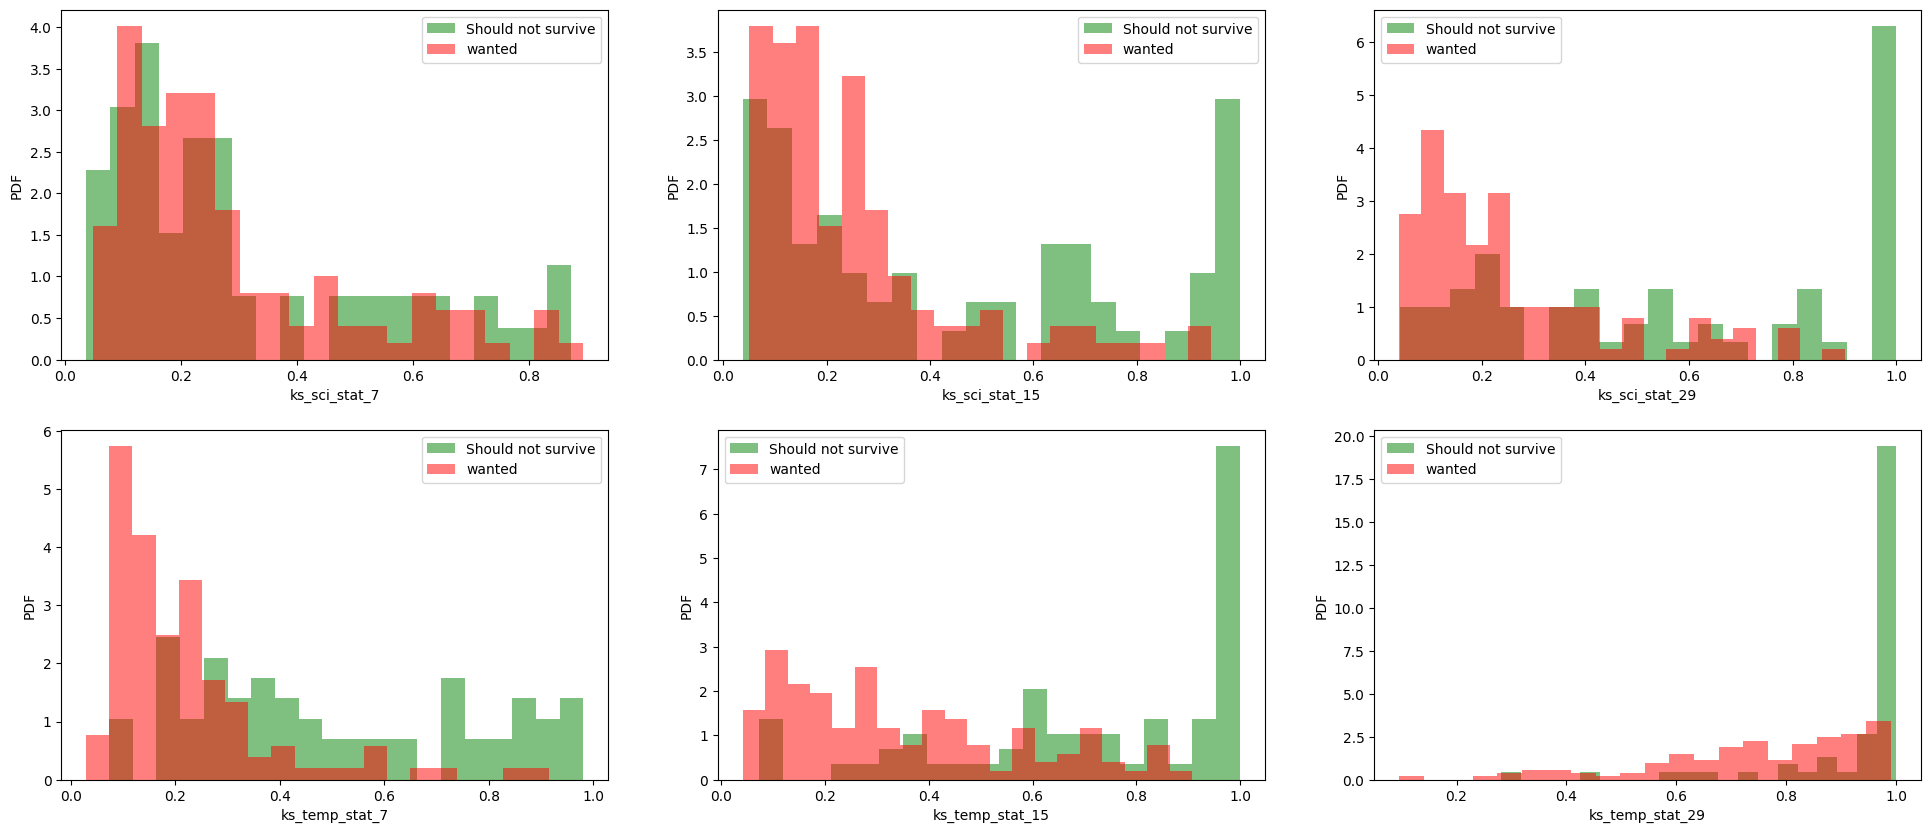

In [81]:
nbins = 20

plt.figure(figsize=(24,10))

for i in range(2, 8):
    name = list(data.keys())[i]
    
    plt.subplot(2,3,i-1)        
    #plt.hist(sso[name], label='SSO', density=True, alpha=0.5, bins=nbins, color='red')
    plt.hist(out[name], label='Should not survive', density=True, alpha=0.5, bins=nbins, color='green')
    plt.hist(wanted[name], label='wanted', density=True, alpha=0.5, bins=nbins, color='red')
    plt.xlabel(name)
    plt.ylabel('PDF')
    #plt.xscale('log')
    plt.legend()

plt.show()
#plt.savefig('kstest_2classesb_log.png')

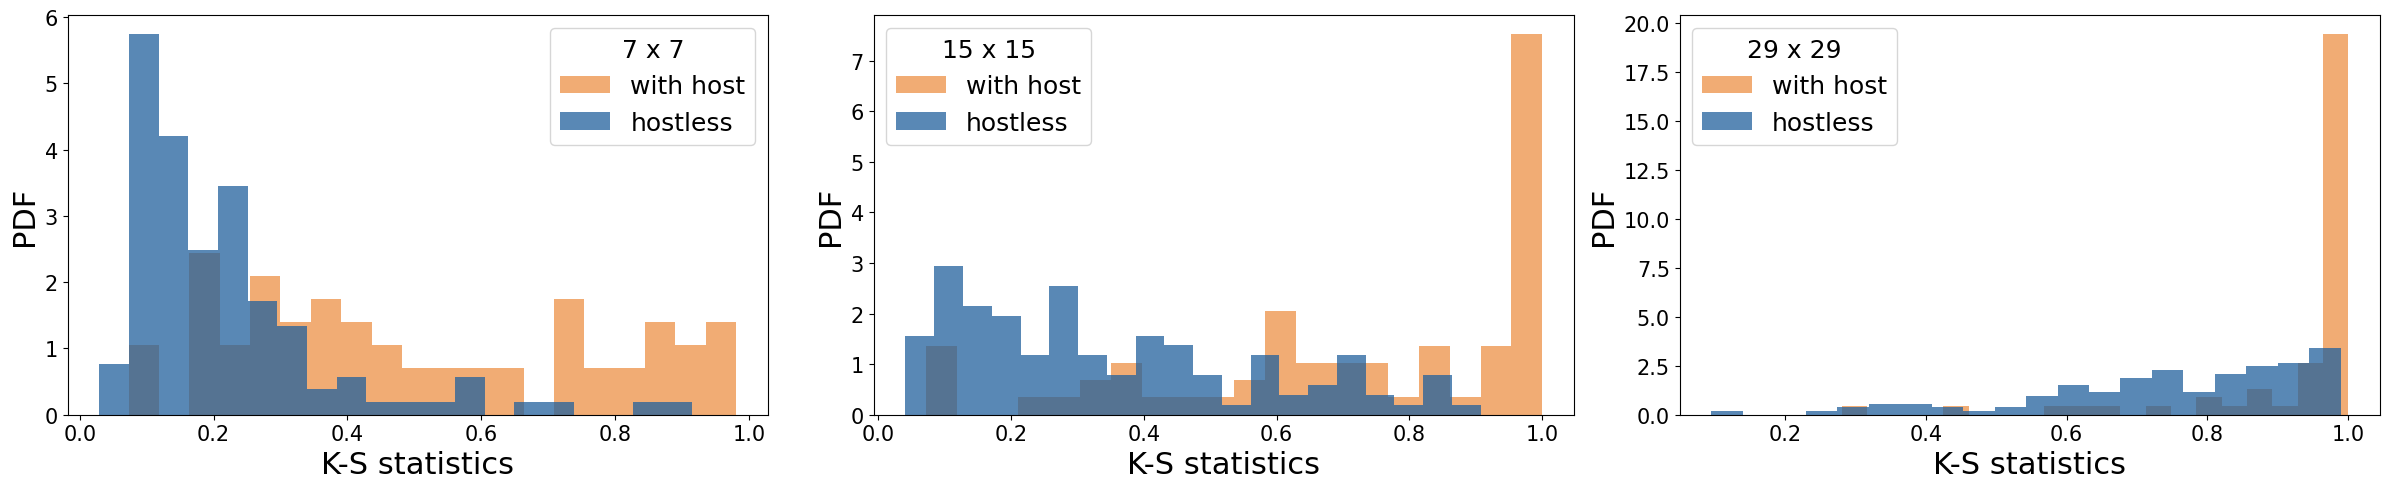

In [135]:
colors={"orange":"#ED9145","dark_brown":"473832","beige":"E2D3C1","rose":"BC7E74",
        "dark_blue":"#21609D","light_blue":"5C92C1","dark_gray":"4D5966",
        "black":"27242A","light_gray":"8999A1","golden_brown":"87581D"}

colors_use = [colors['orange'], colors['dark_blue']]

nbins = 20
stamp = 'temp'

sizes = ['7','15', '29']

plt.figure(figsize=(24,5))

for i in range(3):
    
    plt.subplot(1,3,i+1)        
    plt.hist(out['ks_' + stamp +'_stat_' + sizes[i]], label='with host', 
             density=True, alpha=0.75, bins=nbins, color=colors['orange'])
    plt.hist(list(wanted['ks_' + stamp +'_stat_' + sizes[i]]), 
             label='hostless', 
             density=True, alpha=0.75, bins=nbins, color=colors['dark_blue'])
    plt.xlabel('K-S statistics', fontsize=22)
    plt.ylabel('PDF', fontsize=22)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    #plt.xscale('log')
    plt.legend(fontsize=18, title=sizes[i] + ' x ' + sizes[i], title_fontsize=18)

plt.tight_layout()
plt.savefig('KS_statistics.pdf')

In [139]:
wanted['ks_temp_stat_7'].describe()

count    118.000000
mean       0.216760
std        0.158065
min        0.029573
25%        0.112155
50%        0.175050
75%        0.256106
max        0.915477
Name: ks_temp_stat_7, dtype: float64

In [140]:
wanted['ks_temp_stat_15'].describe()

count    118.000000
mean       0.344144
std        0.226169
min        0.040854
25%        0.160377
50%        0.284711
75%        0.473134
max        0.907513
Name: ks_temp_stat_15, dtype: float64

In [141]:
wanted['ks_temp_stat_29'].describe()

count    118.000000
mean       0.752069
std        0.193299
min        0.095553
25%        0.644617
50%        0.778442
75%        0.908329
max        0.989422
Name: ks_temp_stat_29, dtype: float64

In [136]:
# determine number of contaminats

sizes = ['7', '15', '29']
thresholds = [0.25, 0.5, 0.9]
contaminants = {}

for i in range(len(sizes)):
    cont_temp = out[out['ks_temp_stat_' + sizes[i]] < thresholds[i]]['name']
    cont_sci = out[out['ks_sci_stat_' + sizes[i]] < thresholds[i]]['name']
    all_cont = pd.concat([cont_temp, cont_sci], ignore_index=True)
    contaminants[sizes[i]] = np.unique(all_cont.values).shape[0]

contaminants

{'7': 39, '15': 40, '29': 44}

In [137]:
hostless = {}

for i in range(len(sizes)):
    hostless_temp = wanted[wanted['ks_temp_stat_' + sizes[i]] < thresholds[i]]['name']
    hostless_sci = wanted[wanted['ks_sci_stat_' + sizes[i]] < thresholds[i]]['name']
    all_hostless = pd.concat([hostless_temp, hostless_sci], ignore_index=True)
    hostless[sizes[i]] = np.unique(all_hostless.values).shape[0]

contaminants

{'7': 39, '15': 40, '29': 44}

In [138]:
for i in range(len(sizes)):
     print('Contamination: ', 
           np.round(100 * (contaminants[sizes[i]]/(contaminants[sizes[i]] + hostless[sizes[i]])),2))

Contamination:  27.08
Contamination:  25.97
Contamination:  27.33
